In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv("Credit_Card_Applications.csv")
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
x=dataset.iloc[:,:-1].values 
y=dataset.iloc[:,-1].values
print(x.shape,y.shape)

(690, 15) (690,)


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x=sc.fit_transform(x)


In [5]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)


In [6]:
som.random_weights_init(x)
som.train_random(x,num_iteration=100)

In [7]:
from pylab import pcolor,bone,plot,show ,colorbar

In [8]:
bone()


<Figure size 432x288 with 0 Axes>

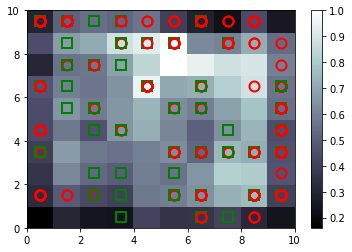

In [9]:
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,j in enumerate(x):
    w=som.winner(j)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
show()

In [10]:
mapping=som.win_map(x)
fraud=np.concatenate((mapping[(5,8)],mapping[(4,6)]),axis=0)
fraud=sc.inverse_transform(fraud)

In [11]:
fraud.shape

(54, 15)

In [12]:
cus=dataset.iloc[:,1:].values

In [13]:
cus.shape

(690, 15)

In [15]:
is_fraud=np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in fraud:
        is_fraud[i]=1

In [17]:
print(is_fraud.shape)
print(is_fraud)

(690,)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc1=StandardScaler()
cus = sc1.fit_transform(cus)



In [29]:
from keras.models import Sequential
from keras.layers import Dense


In [30]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(cus, is_fraud, batch_size = 1, epochs = 3)


Epoch 1/3
690/690 [==============================] - 1s - loss: 0.5215 - acc: 0.9217     
Epoch 2/3
690/690 [==============================] - 0s - loss: 0.2371 - acc: 0.9217     
Epoch 3/3
690/690 [==============================] - 0s - loss: 0.1633 - acc: 0.9217     


In [31]:
#predicting the probability of frauds
y_pred=classifier.predict(cus)

In [32]:
y_pred.shape

(690, 1)

In [33]:
y_pred=np.concatenate((dataset.iloc[:, 0:1].values,y_pred),axis=1)
y_pred.shape

(690, 2)

In [34]:
y_pred=y_pred[y_pred[:, 1].argsort()]

In [40]:
y_pred

array([[1.55941330e+07, 2.25323439e-03],
       [1.57845260e+07, 2.38758326e-03],
       [1.57355720e+07, 2.54496932e-03],
       ...,
       [1.57053790e+07, 3.47887576e-01],
       [1.56700290e+07, 3.47887576e-01],
       [1.56088040e+07, 3.47887576e-01]])